# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: October 3, 2025**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

A. The primary objective is to rigorously compare the effectiveness of three distinct methods for teaching data science to undergraduate students. By evaluating each method’s impact on student outcomes, the experiment aims to identify which teaching strategy leads to the highest level of student learning. Importantly, the study controls for prior knowledge in hypothesis testing—a factor that might otherwise confound results—by using it as a blocking variable. This ensures that the observed differences in student performance are due to the teaching method itself rather than variations in students’ prior preparation.

**Question 2.** Specify the outcome variable

A. The outcome variable is the students’ measured performance after the instructional period. Typically, this is operationalized as the score on a standardized post-instruction assessment designed to evaluate mastery of relevant data science concepts. This quantitative measure allows for objective comparison across the three teaching methods.

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

- **Independent Variable:** The teaching method (Method 1, Method 2, Method 3). This is the main variable being manipulated to observe its effect on student outcomes.
- **Blocking Factor:** Students’ prior knowledge of hypothesis testing (categorized as low, medium, or high). By blocking on this variable, we control for its influence and isolate the effect of the teaching method.
- **Possible Lurking Variables:** Factors such as instructor effectiveness, classroom environment, time of day, student motivation, and background in mathematics or statistics could influence outcomes but are not directly controlled in this study.

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

A. A randomized block design is suitable because it accounts for the variability introduced by differences in prior knowledge among students. Blocking ensures that each teaching method is evaluated across similar groups, reducing unexplained variance and increasing statistical power. In contrast, a completely randomized design would ignore prior knowledge, potentially conflating its effects with those of the teaching methods and leading to biased conclusions.

**Question 5.** State the null and alternative hypotheses for this experiment.

- **Null Hypothesis (H₀):** The mean performance scores of students are the same across all teaching methods; there is no effect of teaching method.
- **Alternative Hypothesis (H₁):** At least one teaching method leads to a different mean performance score, indicating a significant effect of teaching method on student outcomes.


**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

--2025-10-03 15:05:01--  https://github.com/LalithAditya0802/STAT-7220-Applied-Experimental-Design/raw/main/Assignments/HW2/Data%20Science%20Teaching%20Method.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LalithAditya0802/STAT-7220-Applied-Experimental-Design/main/Assignments/HW2/Data%20Science%20Teaching%20Method.xlsx [following]
--2025-10-03 15:05:02--  https://raw.githubusercontent.com/LalithAditya0802/STAT-7220-Applied-Experimental-Design/main/Assignments/HW2/Data%20Science%20Teaching%20Method.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6114 (6.0K) [application/octet-stream]


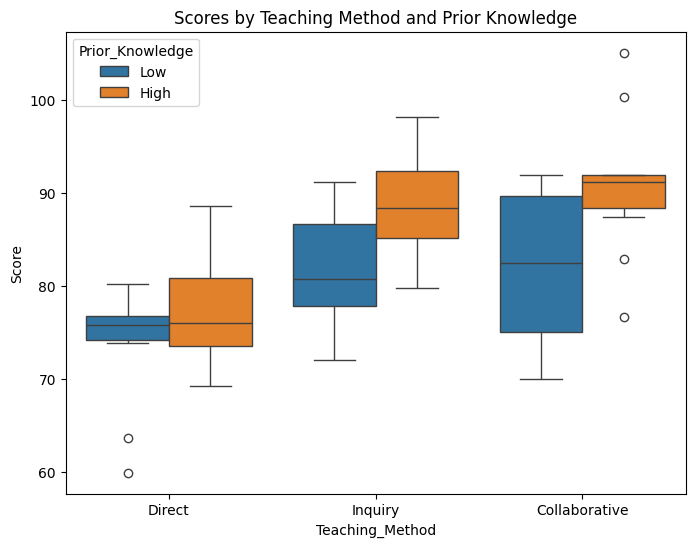

In [8]:
!wget https://github.com/LalithAditya0802/STAT-7220-Applied-Experimental-Design/raw/main/Assignments/HW2/Data%20Science%20Teaching%20Method.xlsx

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Data Science Teaching Method.xlsx")

# Use the correct column names from your file
method_col = 'Teaching_Method'
prior_col = 'Prior_Knowledge'
score_col = 'Score'

print(df.groupby([method_col, prior_col])[score_col].describe())

plt.figure(figsize=(8,6))
sns.boxplot(x=method_col, y=score_col, hue=prior_col, data=df)
plt.title('Scores by Teaching Method and Prior Knowledge')
plt.show()

**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

                                      sum_sq    df          F    PR(>F)
Teaching_Method                  1508.792653   2.0  16.415063  0.000003
Prior_Knowledge                   589.756202   1.0  12.832625  0.000731
Teaching_Method:Prior_Knowledge    74.747613   2.0   0.813224  0.448782
Residual                         2481.708550  54.0        NaN       NaN
Shapiro-Wilk test: ShapiroResult(statistic=np.float64(0.984313332289175), pvalue=np.float64(0.6343906841745357))


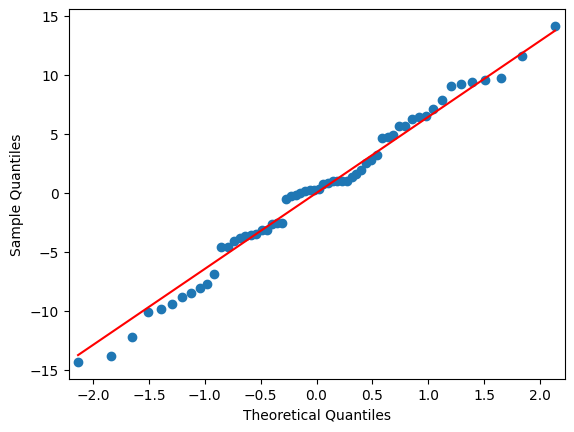

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

model = ols('Score ~ Teaching_Method + Prior_Knowledge + Teaching_Method:Prior_Knowledge', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

residuals = model.resid
print("Shapiro-Wilk test:", shapiro(residuals))
sm.qqplot(residuals, line='s')
plt.show()

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

Levene's test: LeveneResult(statistic=np.float64(1.353095910711567), pvalue=np.float64(0.26661297888105295))


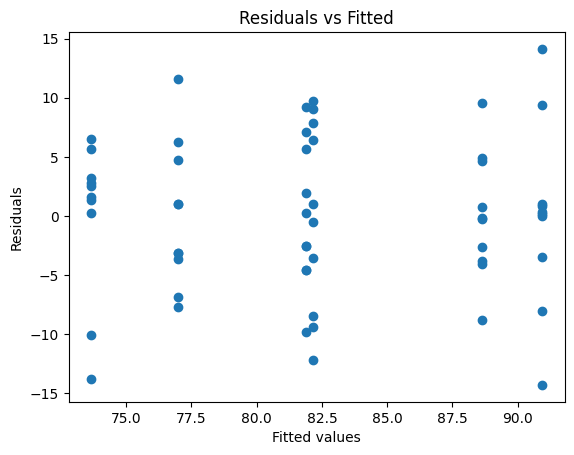

In [12]:
from scipy.stats import levene

groups = [group["Score"].values for name, group in df.groupby("Teaching_Method")]
print("Levene's test:", levene(*groups))

plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

Question 9. Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

Question 10. If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df['Score'], df['Teaching_Method'])
print(tukey.summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Collaborative  Direct  -11.223    0.0 -16.8766 -5.5694   True
Collaborative Inquiry   -1.288 0.8478  -6.9416  4.3656  False
       Direct Inquiry    9.935 0.0003   4.2814 15.5886   True
-------------------------------------------------------------


Question 11. Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations of this experiment.

**PART 2 INSTRUCTIONS**: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the
semester. Below is a table describing the study design and factors:


| Section \ Day     | Monday | Tuesday | Wednesday | Thursday |
|-------------------|--------|---------|-----------|----------|
| **Morning**       | A      | B       | C         | D        |
| **Early Afternoon** | B      | C       | D         | A        |
| **Mid-Afternoon** | C      | D       | A         | B        |
| **Evening**       | D      | A       | B         | C        |


Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the `Online Learning and Engagement.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

A. The experiment seeks to determine which of four online learning platforms (A, B, C, D) most effectively fosters student engagement in an undergraduate data science course. By structuring the study to control for both the day of the week and time of day, the researcher aims to ensure that differences in engagement are attributable to the platform itself rather than scheduling or temporal factors.


**Question 2.** Specify the outcome variable

A. Student engagement, measured quantitatively (e.g., number of interactions, time spent on the platform, assessment scores, or other relevant metrics collected in the dataset).

**Question 3.** Specify the independent variable and blocking factors. What are some other possible lurking variables?

- **Independent Variable:** Online platform (A, B, C, D)
- **Blocking Factors:** Day of the week (Monday–Thursday) and time of day (Morning, Early Afternoon, Mid-Afternoon, Evening)
- **Other Possible Lurking Variables:** Instructor, course difficulty, technical issues, student motivation, internet connectivity.

**Question 4.** Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

A. A Latin Square Design is ideal when there are two blocking factors (day and time) and one treatment factor (platform). This structure ensures that each platform is tested equally across all days and times, controlling for their effects. Randomized block or completely randomized designs cannot simultaneously control for both day and time, risking confounding.

**Question 5.** State the null and alternative hypotheses for this experiment.

- **Null Hypothesis (H₀):** All platforms yield the same mean engagement level.
- **Alternative Hypothesis (H₁):** At least one platform produces a significantly different mean engagement level.

 **Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

--2025-10-03 15:28:56--  https://github.com/LalithAditya0802/STAT-7220-Applied-Experimental-Design/raw/main/Assignments/HW2/Online%20Learning%20and%20Engagement.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LalithAditya0802/STAT-7220-Applied-Experimental-Design/main/Assignments/HW2/Online%20Learning%20and%20Engagement.xlsx [following]
--2025-10-03 15:28:57--  https://raw.githubusercontent.com/LalithAditya0802/STAT-7220-Applied-Experimental-Design/main/Assignments/HW2/Online%20Learning%20and%20Engagement.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5502 (5.4K) [application/octet-st

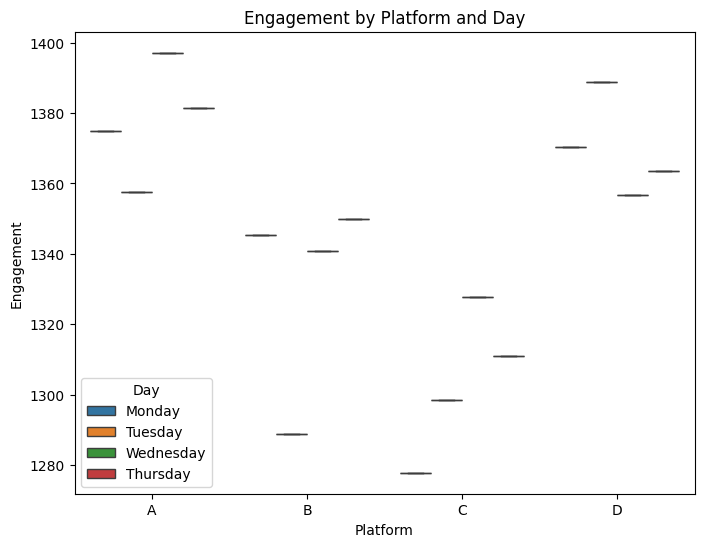

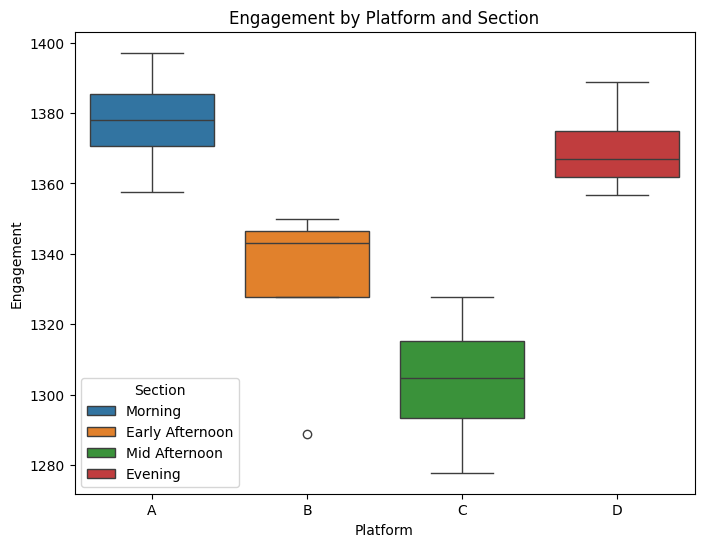

                                    count     mean  std      min      25%  \
Platform Day       Section                                                  
A        Monday    Morning            1.0  1374.88  NaN  1374.88  1374.88   
         Thursday  Morning            1.0  1381.42  NaN  1381.42  1381.42   
         Tuesday   Morning            1.0  1357.65  NaN  1357.65  1357.65   
         Wednesday Morning            1.0  1397.12  NaN  1397.12  1397.12   
B        Monday    Early Afternoon    1.0  1345.51  NaN  1345.51  1345.51   
         Thursday  Early Afternoon    1.0  1349.91  NaN  1349.91  1349.91   
         Tuesday   Early Afternoon    1.0  1288.86  NaN  1288.86  1288.86   
         Wednesday Early Afternoon    1.0  1340.77  NaN  1340.77  1340.77   
C        Monday    Mid Afternoon      1.0  1277.89  NaN  1277.89  1277.89   
         Thursday  Mid Afternoon      1.0  1311.01  NaN  1311.01  1311.01   
         Tuesday   Mid Afternoon      1.0  1298.60  NaN  1298.60  1298.60   

In [19]:
!wget -O "Online Learning and Engagement.xlsx" "https://github.com/LalithAditya0802/STAT-7220-Applied-Experimental-Design/raw/main/Assignments/HW2/Online%20Learning%20and%20Engagement.xlsx"

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='Platform', y='Engagement', hue='Day', data=df2)
plt.title('Engagement by Platform and Day')
plt.show()
plt.figure(figsize=(8,6))
sns.boxplot(x='Platform', y='Engagement', hue='Section', data=df2)
plt.title('Engagement by Platform and Section')
plt.show()
print(df2.groupby(['Platform', 'Day', 'Section'])['Engagement'].describe())

**Question 7.** Build a three-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

                sum_sq   df            F        PR(>F)
Platform  2.163185e+06  3.0  1639.526583  1.229404e-12
Day       1.175124e+03  3.0     0.890653  4.823487e-01
Section   2.434522e+06  3.0  1845.179206  7.230832e-13
Residual  3.958188e+03  9.0          NaN           NaN
Shapiro-Wilk test: ShapiroResult(statistic=np.float64(0.9751694518478372), pvalue=np.float64(0.9137785828125332))


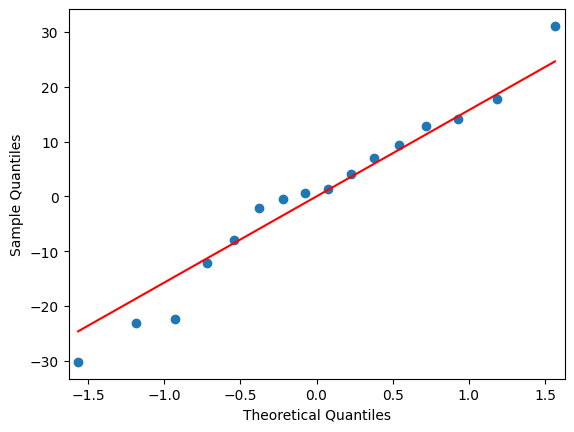

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

model2 = ols('Engagement ~ Platform + Day + Section', data=df2).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print(anova_table2)

residuals2 = model2.resid
print("Shapiro-Wilk test:", shapiro(residuals2))
sm.qqplot(residuals2, line='s')
plt.show()

Question 8. Test the assumption of homogeneity of variance using both a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

Levene's test: LeveneResult(statistic=np.float64(0.17960482313844303), pvalue=np.float64(0.9081774529273039))


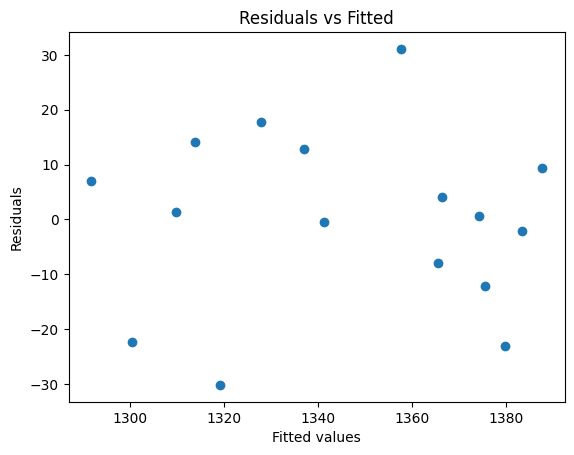

In [22]:
groups2 = [group["Engagement"].values for name, group in df2.groupby("Platform")]
print("Levene's test:", levene(*groups2))

plt.scatter(model2.fittedvalues, residuals2)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

Question 9. Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

Question 10. If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

In [23]:
tukey2 = pairwise_tukeyhsd(df2['Engagement'], df2['Platform'])
print(tukey2.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B  -46.505 0.0347  -89.9249  -3.0851   True
     A      C  -73.945 0.0014 -117.3649 -30.5251   True
     A      D   -7.945 0.9466  -51.3649  35.4749  False
     B      C   -27.44 0.2879  -70.8599  15.9799  False
     B      D    38.56 0.0881   -4.8599  81.9799  False
     C      D     66.0 0.0034   22.5801 109.4199   True
-------------------------------------------------------


Question 11. Write a brief conclusion summarizing the results of your analyses, including potential limitations of this experiment.